<a href="https://colab.research.google.com/github/eriksali/Text-Analytics_LDA/blob/master/lda_doc_topic_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import matplotlib
import time

# Importing Gensim
import gensim
from gensim import corpora

from google.colab import files
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)


Saving utils.py to utils.py


5237

In [ ]:


from utils import load_data
from utils import preprocess_pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [131]:
#dirpath = '/content/drive/MyDrive/lda_silhouette/Names_no_duplicates/'
dirpath = '/content/drive/MyDrive/Names/'
#output = '/content/drive/MyDrive/lda_silhouette/name.csv'

files = [os.path.join(dirpath, fname) for fname in os.listdir(dirpath)]

i = 1
for filename in sorted(files):
    with open(filename, 'r') as f:
        list = f.read().split(' ')
        #s = ", ".join("'" + item + "'" for item in map(str, list))
        s = ", ".join(map(str, list))
        #print(f.read().split(' '))
        path = '/content/drive/MyDrive/lda_silhouette/Names_comma/' + str(i) + '.txt'
        i = i + 1
        
        with open(path, 'w') as f_:
            f_.write(s)

In [ ]:
#dirpath = '/content/drive/MyDrive/lda_silhouette/Names_no_duplicates/'
dirpath = '/content/drive/MyDrive/Names/'
#output = '/content/drive/MyDrive/lda_silhouette/name.csv'

files = [os.path.join(dirpath, fname) for fname in os.listdir(dirpath)]
corpus = []
i = 1
s = ''
for filename in sorted(files):
    with open(filename, 'r') as f:
        #corpus = []
        corpus += [f.read()]
        #s = "".join(f.read())
        
        #print(s)
corpus

In [141]:
import nltk
nltk.download('wordnet')
  
# Apply Preprocessing on the Corpus

# stop loss words 
stop = set(stopwords.words('english'))

# punctuation 
exclude = set(string.punctuation) 

# lemmatization
lemma = WordNetLemmatizer() 

# One function for all the steps:
def clean(doc):
    
    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)  
    
    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())  
    return normalized

# clean data stored in a new list
clean_corpus = [clean(doc).split() for doc in corpus] 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
clean_corpus

In [143]:
# Creating the term dictionary of our courpus that is of all the words (Sepcific to Genism syntax perspective), 
# where every unique term is assigned an index. 

dict_ = corpora.Dictionary(clean_corpus)

print(dict_)

Dictionary(2895 unique tokens: ['correct', 'equal', 'loss', 'pred', 'repeat']...)


In [ ]:
for i in dict_.values():
    print(i)

In [ ]:
# Converting list of documents (corpus) into Document Term Matrix using the dictionary 
doc_term_matrix = [dict_.doc2bow(i) for i in clean_corpus]
doc_term_matrix

In [ ]:
# Creating the object for LDA model using gensim library

Lda = gensim.models.ldamodel.LdaModel
# Running and Training LDA model on the document term matrix.

ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dict_, passes=20, random_state=0, eval_every=None)
# Prints the topics with the indexes: 0,1,2 :

ldamodel.print_topics()

# we need to manually check whethere the topics are different from one another or not

In [151]:
print(ldamodel.print_topics(num_topics=10, num_words=100))

# num_topics mean: how many topics want to extract 
# num_words: the number of words that want per topic

[(0, '0.023*"mock" + 0.023*"respons" + 0.022*"client" + 0.021*"field" + 0.019*"msg" + 0.018*"result" + 0.018*"command" + 0.018*"json" + 0.016*"get" + 0.016*"error" + 0.015*"valu" + 0.014*"return" + 0.013*"arg" + 0.013*"equal" + 0.012*"call" + 0.011*"request" + 0.010*"output" + 0.010*"mocker" + 0.010*"rais" + 0.009*"statu" + 0.009*"object" + 0.009*"data" + 0.009*"new" + 0.008*"except" + 0.008*"type" + 0.008*"run" + 0.008*"str" + 0.008*"expect" + 0.007*"exp" + 0.007*"doc" + 0.007*"api" + 0.007*"demisto" + 0.006*"list" + 0.006*"patch" + 0.006*"incid" + 0.006*"code" + 0.006*"creat" + 0.005*"old" + 0.005*"http" + 0.005*"key" + 0.005*"url" + 0.005*"servic" + 0.005*"contain" + 0.005*"file" + 0.005*"com" + 0.005*"argument" + 0.004*"context" + 0.004*"given" + 0.004*"fetch" + 0.004*"pytest" + 0.004*"max" + 0.004*"actual" + 0.004*"name" + 0.004*"asset" + 0.004*"match" + 0.004*"bodi" + 0.004*"poli" + 0.004*"server" + 0.004*"content" + 0.004*"dict" + 0.004*"local" + 0.004*"min" + 0.004*"line" + 0.0

In [ ]:
# printing the topic associations with the documents
count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

In [153]:
# saving the topic associations with the documents to .csv
import csv

header = ['NameOfDoc', 'WeightPerTopic']

with open('/content/drive/MyDrive/lda_silhouette/weight_per_topic.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    count = 0
    for i in ldamodel[doc_term_matrix]:
        #print("doc : ",count,i)
        # write the data
        writer.writerow(i)
        count += 1

In [127]:
import os
import pandas as pd

dirpath_= '/content/drive/MyDrive/lda_silhouette/Names_comma/'
output = '/content/drive/MyDrive/lda_silhouette/name.csv'
csvout_lst = []
files_= [os.path.join(dirpath_, fname) for fname in os.listdir(dirpath_)]

for filename in sorted(files_):
    data = pd.read_csv(filename, index_col=0, header=None)
    csvout_lst.append(data)
#csvout_lst.index
#print(csvout_lst)
#print (np.arange(len(csvout_lst.index)))
pd.concat(csvout_lst).to_csv(output, index=True)

In [128]:
from pandas import read_csv
df = read_csv('/content/drive/MyDrive/lda_silhouette/name.csv')
corpus = df.values
print(corpus)

[['rmse' ' correct' ' pred' ... nan nan nan]
 ['one' ' true' ' posit' ... nan nan nan]
 ['standard' ' import' ' still' ... nan nan nan]
 ...
 ['config' ' name' ' space' ... nan nan nan]
 ['set' ' configur' ' yaml' ... nan nan nan]
 ['set' ' compon' ' setup' ... nan nan nan]]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
corpus = []
corpus = texts_file.read()

In [129]:
corpus.shape

(1999, 668)

In [130]:
# Creating the term dictionary of our courpus that is of all the words (Sepcific to Genism syntax perspective), 
# where every unique term is assigned an index. 

dict_ = corpora.Dictionary(corpus)

print(dict_)

TypeError: ignored

In [ ]:
for i in dict_.values():
    print(i)

In [ ]:
# Converting list of documents (corpus) into Document Term Matrix using the dictionary 
doc_term_matrix = [dict_.doc2bow(i) for i in corpus]
doc_term_matrix

In [80]:
# Creating the object for LDA model using gensim library

Lda = gensim.models.ldamodel.LdaModel

In [81]:
# Running and Training LDA model on the document term matrix.

ldamodel = Lda(doc_term_matrix, num_topics=10, id2word = dict_, passes=5, alpha=0.1, eta=0.0001, random_state=30, eval_every=None)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


In [84]:
# Prints the topics with the indexes: 0,1,2 :

ldamodel.print_topics(num_topics=10)

# we need to manually check whethere the topics are different from one another or not

# saving the topics to .csv
import csv

header = ['WordsPerTopic']

with open('/content/drive/MyDrive/lda_silhouette/words_per_topic.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    #writer.writerow(header)

    count = 0
    for i in ldamodel[doc_term_matrix]:
        #print("doc : ",count,i)
        # write the data
        writer.writerow(i)
        count += 1

In [ ]:
print(ldamodel.print_topics(num_topics=6, num_words=5))

# num_topics mean: how many topics want to extract 
# num_words: the number of words that want per topic

[(9, '0.005*"gener random data predict without fit random normal size rais fit error gaussian cluster min compon predict" + 0.005*"mani lap complet date extract question question token token token question file tabl question context tabl question context read file file question token number entiti tabl question context get entiti question number entiti" + 0.005*"coverag semant parser experi json model train save load ensur model train save load" + 0.005*"model preserv token loss forward loss backward loss embed token embed mask batch weight embed loss forward loss backward loss forward pass run correctli train tensor dataset tensor dict result model train tensor set result embed result tupl embed shape expect embed shape loss result item forward loss result item backward loss result item almost equal loss forward loss backward loss decim" + 0.005*"sympi physic quantum cartesian sympi physic quantum cartesian arg"'), (8, '0.005*"given valid credenti run integr modul use valid credenti e

In [ ]:
# printing the topic associations with the documents
count = 0
for i in ldamodel[doc_term_matrix]:
    print("doc : ",count,i)
    count += 1

In [ ]:
# saving the topic associations with the documents to .csv
import csv

header = ['NameOfDoc', 'WeightPerTopic']

with open('/content/drive/MyDrive/lda_silhouette/weight_per_topic.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    #writer.writerow(header)

    count = 0
    for i in ldamodel[doc_term_matrix]:
        #print("doc : ",count,i)
        # write the data
        writer.writerow(i)
        count += 1

In [ ]:
documents = corpus.tolist()

In [ ]:
print(documents[5])

['exampl txt read exampl list exampl list data exampl list path path join get temp dir gfile open exampl list path write exampl list data exampl dataset util read exampl list exampl list path list equal exampl']


In [ ]:
start = time.time()
preprocessed_documents = [" ".join(s) for s in documents]
print(f"Preprocessing time: {time.time()-start:.1f}s.")

Preprocessing time: 0.0s.


In [ ]:
import nltk
nltk.download('stopwords')
tf_vectorizer = CountVectorizer(max_df=0.80, min_df=10, stop_words=stopwords.words('english')+['like', 'said', 'could', 'would', 'one', 'know', 'us'], max_features=1000)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tf = tf_vectorizer.fit_transform(preprocessed_documents).toarray()


In [ ]:
features = tf_vectorizer.get_feature_names_out()

In [ ]:
tf.shape

(1999, 785)

In [ ]:
len(features)

785

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [ ]:
from utils import print_topics, get_topics_top_words
n_topics = 5
# alpha = 1 / n_components, beta = 1 / n_components
model = LDA(n_components=n_topics, random_state=0)
# calculate document-to-topic matrix
doc_topic = model.fit_transform(tf)

In [ ]:
from sklearn.cluster import KMeans

C = 5
random_state = 42
clusterer = KMeans(n_clusters=C, random_state=random_state)
cluster_labels = clusterer.fit_predict(doc_topic)

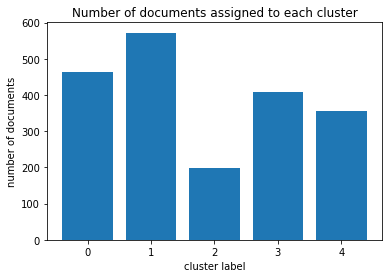

In [ ]:
x, y = np.unique(cluster_labels, return_counts=True)
plt.bar(x, y)
plt.xticks(range(C), range(C))
plt.title("Number of documents assigned to each cluster")
plt.xlabel("cluster label")
plt.ylabel("number of documents")
plt.show()

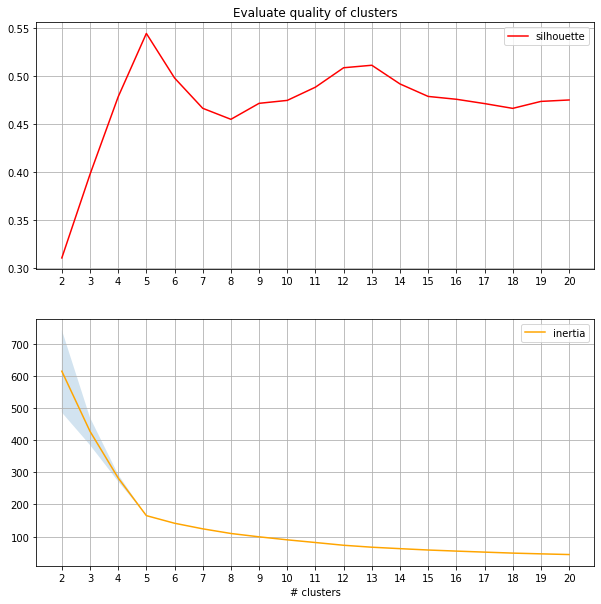

In [ ]:
from sklearn import metrics

def plot_cluster_metrics(data, min_clusters=2, max_clusters=20, iters=10):
    n_clusters = []

    wgss_mean = [] # within group sum of squares, or inertia
    wgss_var = [] # variance of results because it's stochastic

    silhouette_mean = []
    silhouette_var = []
    
    for n in range(min_clusters, max_clusters+1):
        n_clusters.append(n)

        wgss_iters = []
        silhouette_iters = []

        for i in range(iters):
            clusterer = KMeans(n_clusters=n).fit(data)
            wgss_iters.append(clusterer.inertia_)
            silhouette_iters.append(metrics.silhouette_score(data,
                                                             clusterer.labels_,
                                                             metric='euclidean'))

        wgss_mean.append(np.array(wgss_iters).mean())
        wgss_var.append(np.array(wgss_iters).var())

        silhouette_mean.append(np.array(silhouette_iters).mean())
        silhouette_var.append(np.array(silhouette_iters).var())

    wgss_mean = np.array(wgss_mean)
    wgss_var = np.array(wgss_var)

    silhouette_mean = np.array(silhouette_mean)
    silhouette_var = np.array(silhouette_var)
    
    # plot every metric
    plt.figure(figsize=(10, 10))
    
    plt.subplot(211)
    plt.xticks(n_clusters)
    plt.plot(n_clusters, silhouette_mean, alpha=1, color='red', label='silhouette')
    plt.fill_between(n_clusters,
                     silhouette_mean-silhouette_var,
                     silhouette_mean+silhouette_var,
                     alpha=0.2)
    plt.title("Evaluate quality of clusters")
    plt.grid(True)
    plt.legend()
    
    plt.subplot(212)
    plt.xticks(n_clusters)
    plt.plot(n_clusters, wgss_mean, alpha=1, label='inertia', color='orange')
    plt.fill_between(n_clusters, wgss_mean-wgss_var, wgss_mean+wgss_var, alpha=0.2)
    plt.xlabel("# clusters")
    plt.legend()
    plt.grid(True)
    
    #plt.savefig("part-2-images/clustering-metrics.jpg", dpi=100)
    plt.show()
    return
plot_cluster_metrics(doc_topic)

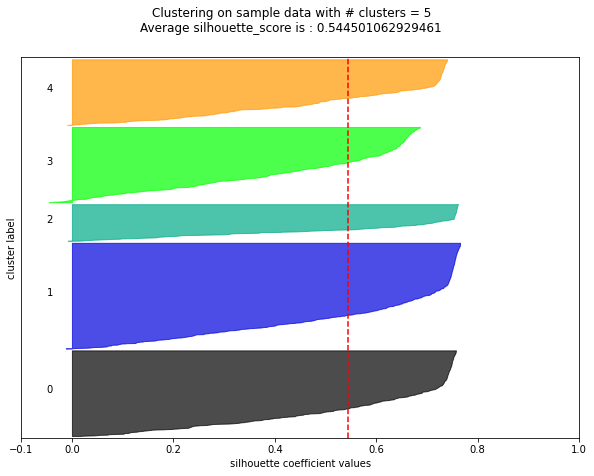

In [ ]:
# adapted from: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_
# silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

def plot_cluster_silhouette(data, n_clusters, cluster_labels):
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(data, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = matplotlib.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0,
                          ith_cluster_silhouette_values,
                          facecolor=color,
                          edgecolor=color,
                          alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Clustering on sample data with # clusters = "
                  + str(n_clusters) + "\nAverage silhouette_score is : "
                  + str(silhouette_avg)))
    
    #plt.savefig("part-2-images/clustering-silhouette.jpg", dpi=100)
    plt.show()
C = n_topics
clusterer = KMeans(n_clusters=C, random_state=random_state)
cluster_labels = clusterer.fit_predict(doc_topic)

plot_cluster_silhouette(doc_topic, C, cluster_labels)